# Optimization using SciPy

## Simple Optimization (Minimum and Maximum)

In [8]:
%matplotlib notebook

In [9]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

- Define a function: $f(x)=x^2 + 10sin(x)$

In [3]:
def f(x):
    return x**2 + 10*np.sin(x)  # Objective Function

In [4]:
x = np.linspace(-10, 10, 51)
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [5]:
y = f(x)
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

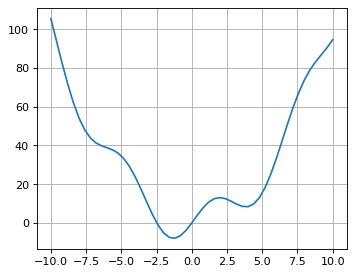

In [42]:
fig = plt.figure(figsize=(5,4), dpi=80)
plt.plot(x, y)
plt.grid('on')
plt.show()

In [14]:
import scipy.optimize as opt

- Find a minimum of the function f(x) using the BFGS(Broyden-Fletcher-Goldfarb-Shanno) method, starting from a initial point x0 = 0. 

In [24]:
x0 = 0
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
        opt.fmin_bfgs(f,  # Objective function to be minimized.
        x0=x0,  # Initial guess.
        maxiter=2000,  # Maximum number of iterations to perform.
        full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.


Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


In [19]:
xopt, fopt

(array([-1.30644012]), -7.945823375615215)

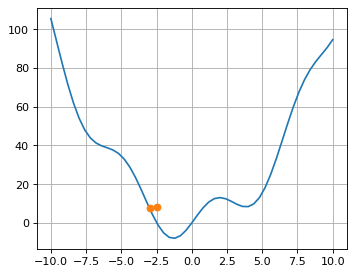

In [38]:
fig = plt.figure(figsize=(5,4), dpi=80)
plt.plot(x,y)
plt.plot([x0, xopt],[f(x0), fopt], 'o')
plt.grid('on')
plt.show()

- What if we start from x0 = 6 ?

In [25]:
x0 = 6 
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
        opt.fmin_bfgs(f,  # Objective function to be minimized.
        x0=x0,  # Initial guess.
        maxiter=2000,  # Maximum number of iterations to perform.
        full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 7
         Function evaluations: 16
         Gradient evaluations: 8


In [26]:
xopt, fopt

(array([3.83746709]), 8.315585579477458)

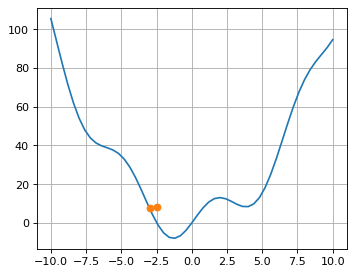

In [36]:
fig = plt.figure(figsize=(5,4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid('on')
plt.show()

- Find the global minimum using the basinhopping method.

In [28]:
res = \
    opt.basinhopping(f, 
                     x0=x0, 
                     T=1,  # The “temperature” parameter
                     stepsize=2)  # Initial step size
res

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.0858477]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1218
                        nit: 100
                       njev: 609
                          x: array([-1.30644001])

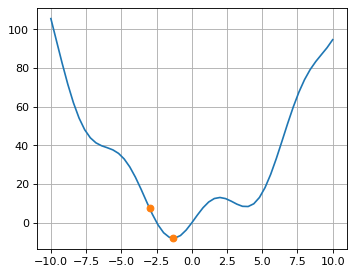

In [35]:
fig = plt.figure(figsize=(5,4), dpi=80)
plt.plot(x, y)
plt.plot([x0, res.x], [f(x0), res.fun], 'o')
plt.grid('on')
plt.show()

## Solving Equations

- Solve the equation $f(x)=x^2 + 10sin(x)=0$

In [30]:
x0 = 1
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([0.])

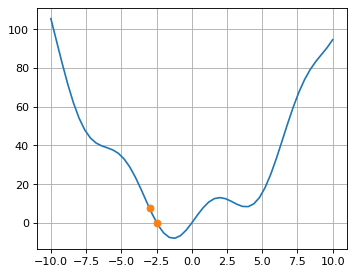

In [34]:
fig = plt.figure(figsize=(5,4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

In [32]:
x0 = -3
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([-2.47948183])

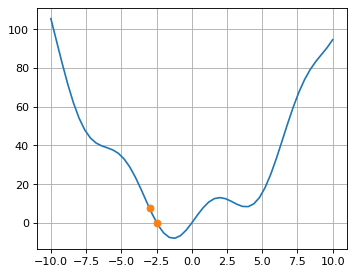

In [33]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

## Curve Fitting

- Curve fitting is a procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets('the residuals') of the points from the curve.

In [48]:
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [46]:
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

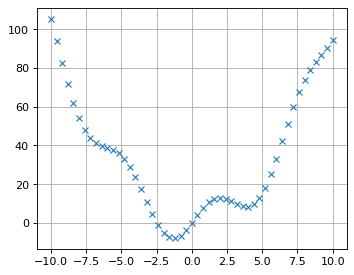

In [49]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.grid('on')
plt.show()

In [50]:
y_noise = f(x) + 5*np.random.randn(x.size)  # Add some random noise
y_noise

array([104.79007818,  92.84737189,  91.16546145,  70.19916045,
        60.49216398,  49.65453058,  46.66886681,  39.63909326,
        40.88801752,  40.33926062,  33.7432906 ,  38.1071468 ,
        27.43961785,  23.26491219,  34.9461266 ,  24.18860581,
        13.87410455,  15.83893475,   2.2110732 ,  -0.68390617,
        -3.14719515,  -6.30062629, -12.23529856, -10.18447733,
        -6.55951127,   1.54848861,  -5.53267414,   3.24199201,
        11.62199903,  16.16692355,  11.25225384,  10.87851279,
        11.05741697,   4.49652931,  19.13882957,  10.324653  ,
        10.87823016,   2.14254584,  22.77515694,  21.65289278,
        29.66178561,  44.14429197,  56.83300904,  60.06967082,
        63.24926928,  74.9758168 ,  73.44161391,  76.93229318,
        90.35069653,  97.74216377,  93.07723233])

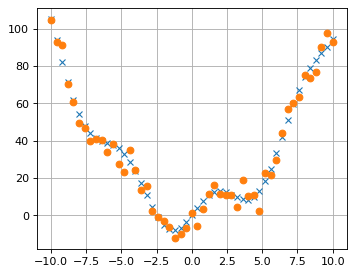

In [51]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.plot(x, y_noise, 'o')
plt.grid('on')
plt.show()

- Fit a function $ f2(x)= ax^2+bsin(x)$ by determining the optimal values of the coefficients a and b.

In [53]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [54]:
guess = [2, 2]  # Initial guess for a and b, respectively
params, cov = opt.curve_fit(f2, x, y_noise, guess)
params

array([0.99232992, 9.62116576])

In [ ]:
a, b = params[0], para
b = params[1]
y_fit = f2(x, a, b)
y_fit